<a href="https://colab.research.google.com/github/kassif06/AI_Assignment/blob/main/AI_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from math import sqrt as squareroot
import seaborn as sns

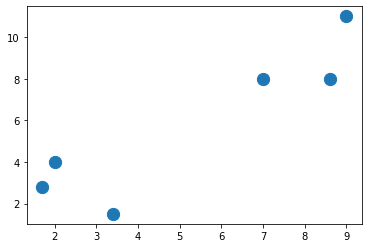

In [2]:
# toy dataset creation 
X = np.array([[2, 4],
              [1.7, 2.8],
              [7, 8],
              [8.6, 8],
              [3.4, 1.5],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [3]:
def centroids_initialization(k, x):

    # set the dimmentions of the x
    n_dims = x.shape[1]
    min_centroid = x.min().min()
    max_centroid = x.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(min_centroid, max_centroid, n_dims)
        centroids.append(centroid)

    centroids = np.array(centroids)

    return centroids



In [4]:
# Centroid initialization 
centroids = centroids_initialization(2, X)
print (centroids)

[[ 5.06330204  2.9764132 ]
 [10.89840393 10.01113534]]


In [5]:
# Getting the ecludian distance
def euclidean_distance(p, q):
    # Euclidean distance (l2 norm)
    # 2-d scenario: square root 
    distance = squareroot(sum((q-p)**2))
    return distance

In [6]:
# comparing distances to centroids 
def closestCentroid(x, centroids):
    assignments = []
    for i in x:
        # distance between one data point and centroids
        distance=[]
        for j in centroids:
            distance.append(euclidean_distance(i, j))
            # assign each data point to the cluster with closest centroid
        assignments.append(np.argmin(distance))
    return np.array(assignments)

In [10]:
# Updatating the centroids
def updateCentroid(x, clusters, K):
    new_centroids = []
    for c in range(K):
        # Update the cluster centroid with the average of all points in this cluster
        cluster_mean = x[clusters == c].mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [8]:
# K-mean fuction to classify 
def kmeans(x, K):
    # initialize the centroids of 2 clusters with the initialization function
    centroids = centroids_initialization(2, X)
    print('Initialized centroids: {}'.format(centroids))
    for i in range(20):
        clusters = closestCentroid(x, centroids)
        centroids = updateCentroid(x, clusters, K)
        print('Iteration: {}, Centroids: {}'.format(i, centroids))
    return centroids,clusters

In [11]:
K = 2

centroids,clusters = kmeans(X, K)

Initialized centroids: [[2.56324499 5.11426121]
 [7.57881313 7.80600544]]
Iteration: 0, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 1, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 2, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 3, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 4, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 5, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 6, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 7, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 8, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 9, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 10, Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 11, Centroids: [array([2.36666667, 2.76666667]), array([

In [12]:
# transform the results to an np array for visualization
clusters = np.array(clusters)
centroids = np.array(centroids)

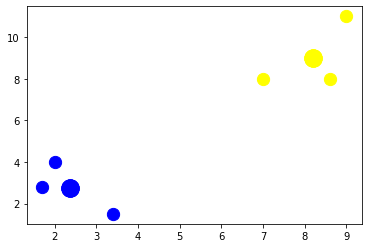

In [13]:
clo=["blue","yellow"]
for i in range(len(clusters)) : 
    for j in range(K):
        if j==clusters[i]:
            plt.scatter(X[i,0], X[i,1],color=clo[j], s=150)
            plt.scatter(centroids[j,0], centroids[j,1],color=clo[j], s=300)
plt.show() 